In [1]:
library(readxl)
library(dplyr)
install.packages("corrplot")
library(corrplot)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jansu\AppData\Local\Temp\RtmpcjhiXl\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


In [2]:
venek <- data.frame(read_excel("Venek.xlsx")) #nacitam data
vnitrek <- data.frame(read_excel("Vnitrek.xlsx"))
dotaznicek <- data.frame(read_excel("dotaznicek.xlsx"))

dotaznicek <- dotaznicek[,-1]

venek <- venek[,-1] #prvni sloupec mazu
colnames(venek)[1] <- "inicialy" #novy prvni sloupec pojmenovavam jako inicialy

vnitrek <- vnitrek[,-1]
colnames(vnitrek)[1] <- "inicialy"

New names:
* `` -> ...1
* `` -> ...2
New names:
* `` -> ...1
* `` -> ...2
New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3


In [6]:
dotaznicek$helpvar <- c(1:nrow(dotaznicek))
dotaznicek$helpvar2 <- ifelse(dotaznicek$helpvar %% 2 == 0,1,0)
d_vnitrek <- subset(dotaznicek, helpvar2 == 0)
d_venek <- subset(dotaznicek, helpvar2 != 0)

In [72]:
d_vnitrek %>% head()
d_venek %>% head()
head(venek)
head(vnitrek)

,...2,...3,Dnes.jsem.se.vyspal.a.opravdu.skvěle.,Večer.jsem.usnul.a.velmi.rychle.,Během.noci.jsem.se.vůbec.neprobouzel.a.,V.noci.se.mi.zdály.živé.sny.,Pamatuji.si..co.se.mi.v.noci.zdálo.,Dnes.se.mi.vstávalo.opravdu.dobře.,Po.probuzení.jsem.se.cítil.a.odpočatý.á.a.plný.á.energie.,Celkově.jsem.se.tento.den.cítil.a.plný.á.energie.a.neunavný.á.,Přes.den.se.mi.dařilo.soustředit.se.na.mé.aktivity.u.náročné.na.pozornost.,Celkově.jsem.tento.den.měl.a.chuť.podnikat.spoustu.produktivních.aktivit.,Dnes.jsem.se.cítil.v.psychické.pohodě.,Dnes.jsem.mě.l.chuť.vykonávat.fyzickou.aktivitu.
1,vevnitř,AD,8,8,8,5,8,6,7,7,8,7,6,7
3,NA,JG,4,2,6,8,13,5,6,4,4,5,5,4
5,NA,JK,4,6,8,9,9,5,5,5,6,5,5,5
7,NA,KL,7,6,10,7,8,7,6,8,6,5,4,4
9,NA,NL,10,11,9,10,11,12,9,8,10,7,6,9
11,NA,OC,7,2,4,10,12,6,5,5,4,7,6,7


,...2,...3,Dnes.jsem.se.vyspal.a.opravdu.skvěle.,Večer.jsem.usnul.a.velmi.rychle.,Během.noci.jsem.se.vůbec.neprobouzel.a.,V.noci.se.mi.zdály.živé.sny.,Pamatuji.si..co.se.mi.v.noci.zdálo.,Dnes.se.mi.vstávalo.opravdu.dobře.,Po.probuzení.jsem.se.cítil.a.odpočatý.á.a.plný.á.energie.,Celkově.jsem.se.tento.den.cítil.a.plný.á.energie.a.neunavný.á.,Přes.den.se.mi.dařilo.soustředit.se.na.mé.aktivity.u.náročné.na.pozornost.,Celkově.jsem.tento.den.měl.a.chuť.podnikat.spoustu.produktivních.aktivit.,Dnes.jsem.se.cítil.v.psychické.pohodě.,Dnes.jsem.mě.l.chuť.vykonávat.fyzickou.aktivitu.
2,venku,AD,4,5,11,4,10,3,4,6,6,5,3,5
4,NA,JG,6,3,10,12,12,8,9,8,8,11,10,8
6,NA,JK,4,3,6,3,9,5,7,6,7,4,7,3
8,NA,KL,11,5,13,12,14,4,7,12,9,9,6,7
10,NA,NL,5,6,7,6,9,3,5,6,7,5,5,9
12,NA,OC,5,7,7,7,8,7,6,7,7,8,6,6


inicialy,TIB,Sleep.time,onset.latency,efficiency,WASO,X.probuzení
ad,1899-12-31 07:48:45,1899-12-31 07:10:45,4.25,91.795,31.75,16.0
jg,1899-12-31 08:26:00,1899-12-31 07:12:00,15.25,85.510,46.50,20.5
jk,1899-12-31 06:50:30,1899-12-31 05:15:15,3.75,76.880,57.50,32.0
kl,1899-12-31 08:31:00,1899-12-31 06:39:00,24.75,78.250,56.75,33.5
nl,1899-12-31 08:12:30,1899-12-31 06:30:30,9.25,79.355,63.50,26.0
oc,1899-12-31 08:26:15,1899-12-31 05:59:45,15.25,71.190,85.75,39.0


inicialy,TIB,Sleep.time,onset.latency,efficiency,WASO,X.probuzení
ad,1899-12-31 08:03:00,1899-12-31 06:26:45,5.00,80.085,56.75,31.5
jg,1899-12-31 08:15:00,1899-12-31 06:59:15,11.50,84.985,51.50,27.5
jk,1899-12-31 07:46:45,1899-12-31 05:54:45,12.00,76.135,95.50,49.0
kl,1899-12-31 08:04:00,1899-12-31 06:46:00,15.50,83.990,51.25,34.5
nl,1899-12-31 10:12:45,1899-12-31 07:46:15,40.00,76.255,92.25,49.5
oc,1899-12-31 08:15:15,1899-12-31 06:18:45,5.75,76.450,87.00,50.0



Call:
lm(formula = po ~ pred, data = soucty)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2462 -2.7547 -1.4854  0.5487  9.8051 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  13.1097    10.1756   1.288  0.23363   
pred          0.8291     0.1773   4.677  0.00159 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.642 on 8 degrees of freedom
Multiple R-squared:  0.7322,	Adjusted R-squared:  0.6987 
F-statistic: 21.87 on 1 and 8 DF,  p-value: 0.001589


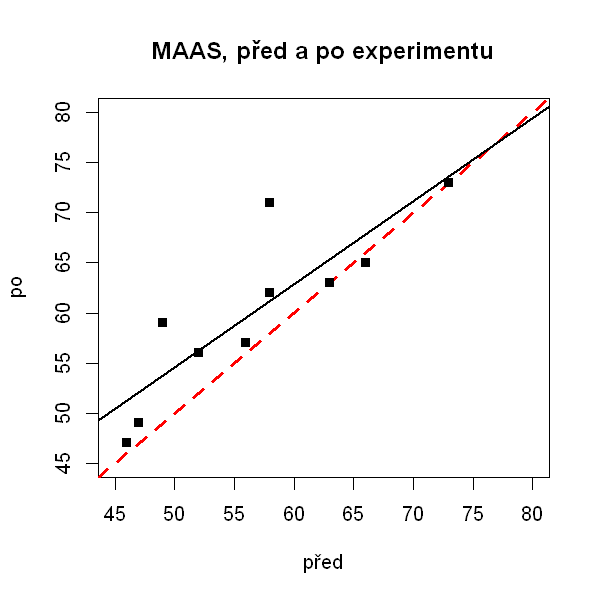

In [73]:
soucty <- data.frame(read_excel("soucty_pred_po.xlsx")) #nacitam data

model_soucty <- lm(po ~ pred, data = soucty)
summary(model_soucty)
plot(soucty, type = "n", xlab = "před", ylab = "po", xlim = c(45,80), ylim = c(45,80))
abline(a = 0, b = 1, col = "red", lty = 2, lwd = 3)
abline(a = model_soucty$coefficients[1], b = model_soucty$coefficients[2], lty = 1, lwd = 2, col = "black")
points(soucty$pred, soucty$po, pch = 15)
title("MAAS, před a po experimentu")

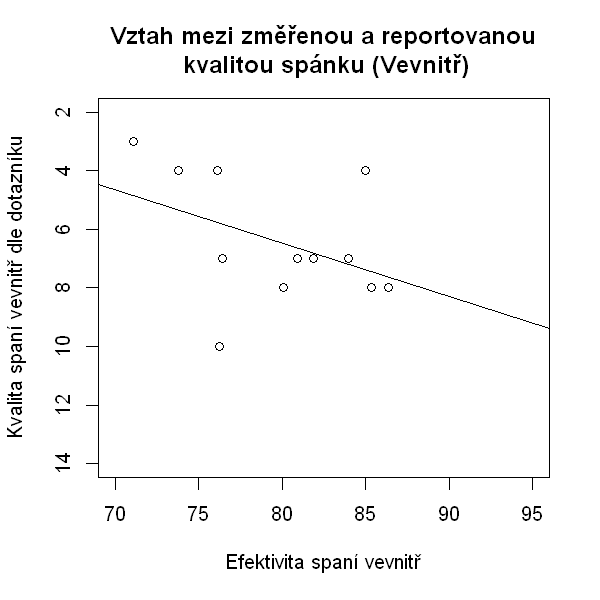


Call:
lm(formula = d_vnitrek[, 3] ~ vnitrek$efficiency)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3700 -1.4313  0.2874  0.7213  4.2254 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)         -8.1609     9.8955  -0.825    0.429
vnitrek$efficiency   0.1827     0.1238   1.476    0.171

Residual standard error: 2.045 on 10 degrees of freedom
Multiple R-squared:  0.1788,	Adjusted R-squared:  0.09673 
F-statistic: 2.178 on 1 and 10 DF,  p-value: 0.1708



Call:
lm(formula = d_venek[, 3] ~ venek$efficiency)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9648 -1.6869 -0.4436  1.4096  6.2350 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)       23.3196    10.4591    2.23   0.0499 *
venek$efficiency  -0.2016     0.1301   -1.55   0.1521  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.132 on 10 degrees of freedom
Multiple R-squared:  0.1937,	Adjusted R-squared:  0.1131 
F-statistic: 2.403 on 1 and 10 DF,  p-value: 0.1521


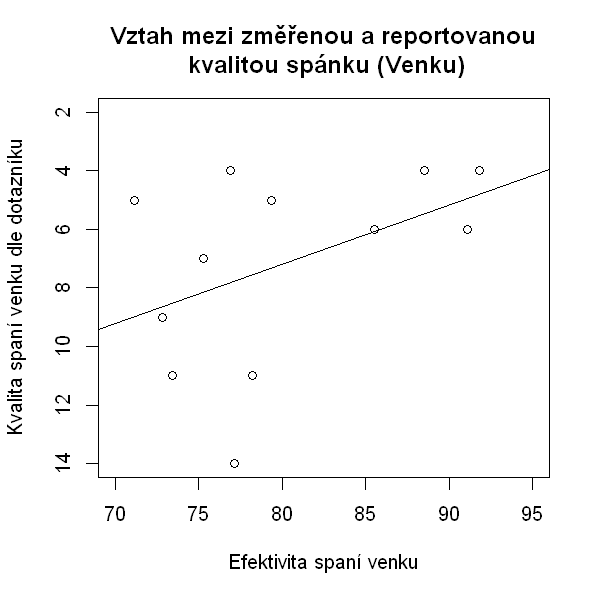

In [12]:
options(repr.plot.width=5, repr.plot.height=5)  

plot(vnitrek$efficiency, d_vnitrek[,3], main = "Vztah mezi změřenou a reportovanou\n kvalitou spánku (Vevnitř)", xlab = "Efektivita spaní vevnitř", ylab = "Kvalita spaní vevnitř dle dotazníku",
     ylim = c(14,2), xlim = c(70,95))
model1 <- lm(d_vnitrek[,3] ~ vnitrek$efficiency)
abline(a=model1$coefficients[1], b=model1$coefficients[2])

plot(venek$efficiency, d_venek[,3], main = "Vztah mezi změřenou a reportovanou\n kvalitou spánku (Venku)", xlab = "Efektivita spaní venku", ylab = "Kvalita spaní venku dle dotazníku",
     ylim = c(14,2), xlim = c(70,95))
model2 <- lm(d_venek[,3] ~ venek$efficiency)
abline(a=model2$coefficients[1], b=model2$coefficients[2])

summary(model1)
summary(model2)


Call:
lm(formula = d_venek[, 8] ~ d_vnitrek[, 8])

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8390 -1.4555 -0.8048  1.2192  6.9281 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)      8.1404     2.7477   2.963   0.0142 *
d_vnitrek[, 8]  -0.3836     0.3945  -0.972   0.3539  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.752 on 10 degrees of freedom
Multiple R-squared:  0.08635,	Adjusted R-squared:  -0.005015 
F-statistic: 0.9451 on 1 and 10 DF,  p-value: 0.3539



Call:
lm(formula = y ~ x, data = help_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.20000 -0.87857 -0.05714  0.94286  1.80000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12.0571     2.2614   5.332 0.000701 ***
x            -1.1429     0.3698  -3.091 0.014874 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.384 on 8 degrees of freedom
Multiple R-squared:  0.5442,	Adjusted R-squared:  0.4872 
F-statistic: 9.552 on 1 and 8 DF,  p-value: 0.01487


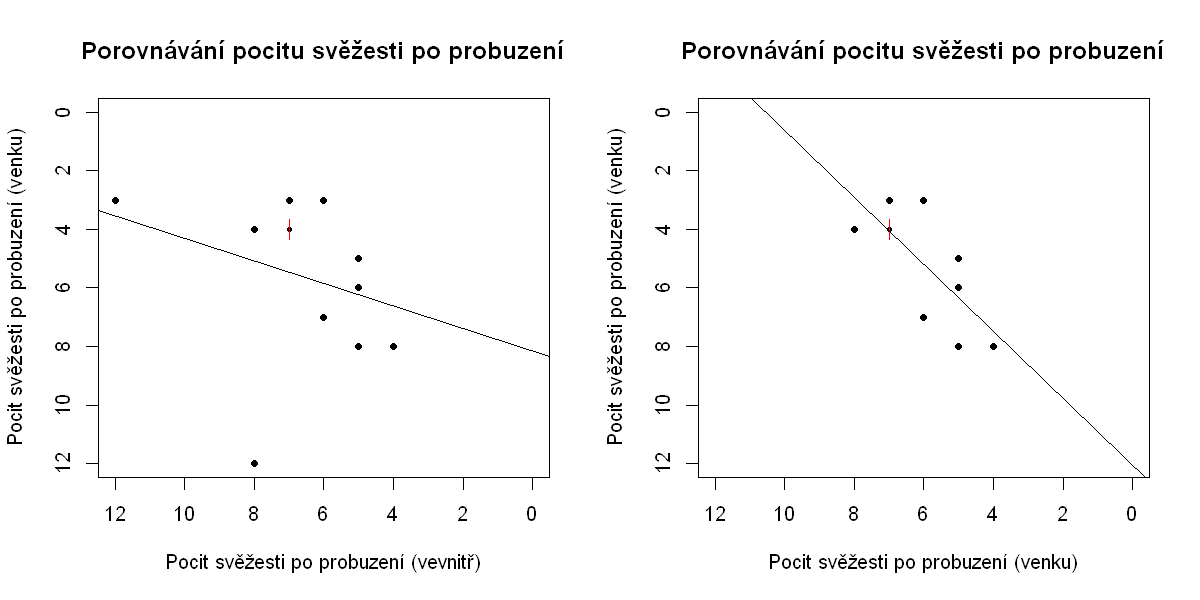

In [14]:
options(repr.plot.width=10, repr.plot.height=5)  
par(mfrow = c(1,2)) #smaz tohle, kdyz obrazky budes chtit jednotlive

popis_x <- "Pocit svěžesti po probuzení (vevnitř)"
popis_y <- "Pocit svěžesti po probuzení (venku)"
nadpis <- "Porovnávání pocitu svěžesti po probuzení"

sunflowerplot(d_vnitrek[,8], d_venek[,8], main = nadpis, xlab = popis_x,
              ylab = popis_y, xlim = c(12,0), ylim = c(12,0))
model5 <- lm(d_venek[,8] ~ d_vnitrek[,8])
summary(model5)
abline(a=model5$coefficients[1], b=model5$coefficients[2])


y <- d_venek[,8]
x <- d_vnitrek[,8]
help_data <- data.frame(x)
help_data$y <- y
help_data <- help_data[c(-5,-10),]
sunflowerplot(help_data$x, help_data$y, main = nadpis, xlab = popis_y, ylab = popis_y, xlim = c(12,0), ylim = c(12,0))
model6 <- lm(y ~ x, data = help_data)
summary(model6)
abline(a=model6$coefficients[1], b=model6$coefficients[2])

In [15]:
noc_jedna <- data.frame(read_excel("Venek-1.noc.xlsx")) #nacitam data
noc_dva <- data.frame(read_excel("venek-2.noc.xlsx")) #nacitam data


Call:
lm(formula = noc_dva$Sleep.Efficiency..percent. ~ noc_jedna$Sleep.Efficiency..percent.)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0466 -5.7426  0.9997  4.2226  6.8787 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)                           27.4725    16.9598   1.620  0.13633   
noc_jedna$Sleep.Efficiency..percent.   0.6894     0.2148   3.209  0.00935 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.682 on 10 degrees of freedom
Multiple R-squared:  0.5073,	Adjusted R-squared:  0.458 
F-statistic:  10.3 on 1 and 10 DF,  p-value: 0.00935


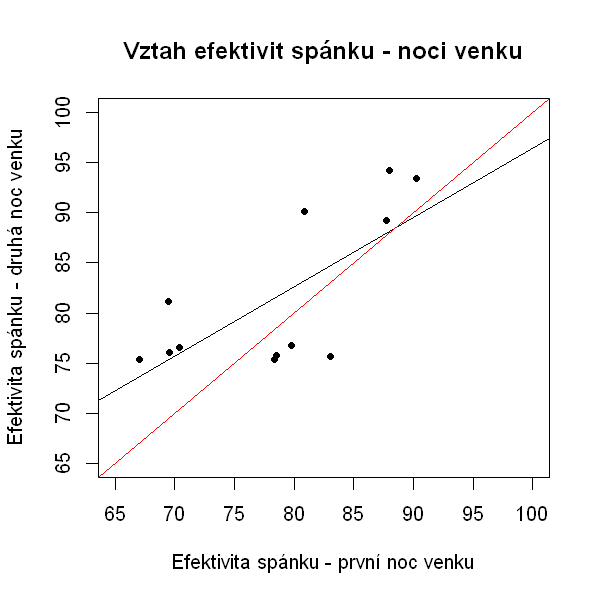

In [17]:
nadpis3 <- "Vztah efektivit spánku - noci venku"
popis_x3 <- "Efektivita spánku - první noc venku"
popis_y3 <- "Efektivita spánku - druhá noc venku"

sunflowerplot(noc_jedna$Sleep.Efficiency..percent., noc_dva$Sleep.Efficiency..percent.,
              main = nadpis3, xlab = popis_x3, ylab = popis_y3, xlim = c(65,100), ylim = c(65,100))
model_noc2 <- lm(noc_dva$Sleep.Efficiency..percent. ~ noc_jedna$Sleep.Efficiency..percent.)
summary(model_noc2)
abline(a=model_noc2$coefficients[1], b=model_noc2$coefficients[2])
abline(a=0, b=1, col  = "red")

[1] 0.8915274
[1] 0.8704923
[1] 0.1022422
[1] 0.00072208


In [86]:
d_venek <- select(d_venek, -contains("help"))
d_vnitrek <- select(d_vnitrek, -contains("help"))

for (i in 4:ncol(venek)){
    test1 <- t.test(venek[,i],vnitrek[,i], paired = TRUE, alternative = "two.sided")
    #test2 <- t.test(venek[,i],vnitrek[,i], paired = FALSE, alternative = "two.sided")
    print(c(test1$p.value, i , colnames(venek)[i]))
}

t.test(venek[,7],vnitrek[,7], paired = TRUE, alternative = "less")
print("XXXXXXXXXXXXXXXXXXXXXXXXXXXX")


for (i in 3:ncol(d_venek)){
    test <- t.test(d_venek[,i], d_vnitrek[,i], paired = TRUE, alternative = "two.sided")
    print(c(test$p.value,i, colnames(d_venek)[i]))
}

[1] "0.891527432108954" "4"                 "onset.latency"    
[1] "0.870492347043083" "5"                 "efficiency"       
[1] "0.102242175756318" "6"                 "WASO"             
[1] "0.00072207995350091" "7"                   "X.probuzení"        



	Paired t-test

data:  venek[, 7] and vnitrek[, 7]
t = -4.6354, df = 11, p-value = 0.000361
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -6.100159
sample estimates:
mean of the differences 
              -9.958333 


[1] "XXXXXXXXXXXXXXXXXXXXXXXXXXXX"
[1] "0.548994434376146"                    
[2] "3"                                    
[3] "Dnes.jsem.se.vyspal.a.opravdu.skvěle."
[1] "0.728641978218357"                "4"                               
[3] "Večer.jsem.usnul.a.velmi.rychle."
[1] "0.0217486159326938"                     
[2] "5"                                      
[3] "Během.noci.jsem.se.vůbec.neprobouzel.a."
[1] "0.899985095508063"            "6"                           
[3] "V.noci.se.mi.zdály.živé.sny."
[1] "0.496591190367002"                   "7"                                  
[3] "Pamatuji.si..co.se.mi.v.noci.zdálo."
[1] "0.358807847371101"                  "8"                                 
[3] "Dnes.se.mi.vstávalo.opravdu.dobře."
[1] "0.324339243469778"                                        
[2] "9"                                                        
[3] "Po.probuzení.jsem.se.cítil.a.odpočatý.á.a.plný.á.energie."
[1] "0.00926052542144537"                       

In [51]:
d_venek[,c(5,10,11,12)]

,Během.noci.jsem.se.vůbec.neprobouzel.a.,Celkově.jsem.se.tento.den.cítil.a.plný.á.energie.a.neunavný.á.,Přes.den.se.mi.dařilo.soustředit.se.na.mé.aktivity.u.náročné.na.pozornost.,Celkově.jsem.tento.den.měl.a.chuť.podnikat.spoustu.produktivních.aktivit.
2,11,6,6,5
4,10,8,8,11
6,6,6,7,4
8,13,12,9,9
10,7,6,7,5
12,7,7,7,8
14,12,10,7,8
16,6,8,7,9
18,9,7,8,6
20,13,13,4,12


In [81]:
t.test(d_venek[,5], d_vnitrek[,5], paired = TRUE, alternative = "greater")
t.test(d_venek[,10], d_vnitrek[,10], paired = TRUE, alternative = "greater")
t.test(d_venek[,11], d_vnitrek[,11], paired = TRUE, alternative = "greater")
t.test(d_venek[,12], d_vnitrek[,12], paired = TRUE, alternative = "greater")

sum(d_venek[,5])
sum(d_vnitrek[,5])


	Paired t-test

data:  d_venek[, 5] and d_vnitrek[, 5]
t = 2.6712, df = 11, p-value = 0.01087
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.6553558       Inf
sample estimates:
mean of the differences 
                      2 



	Paired t-test

data:  d_venek[, 10] and d_vnitrek[, 10]
t = 3.1489, df = 11, p-value = 0.00463
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 1.145804      Inf
sample estimates:
mean of the differences 
               2.666667 



	Paired t-test

data:  d_venek[, 11] and d_vnitrek[, 11]
t = 2.3333, df = 11, p-value = 0.01982
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.4030864       Inf
sample estimates:
mean of the differences 
                   1.75 



	Paired t-test

data:  d_venek[, 12] and d_vnitrek[, 12]
t = 2.5236, df = 11, p-value = 0.01415
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.5286533       Inf
sample estimates:
mean of the differences 
               1.833333 


[1] 111

[1] 87

In [71]:
for (i in 3:ncol(d_venek)){
    test <- wilcox.test(d_venek[,i], d_vnitrek[,i], paired = TRUE, alternative = "two.sided")
    print(c(test$p.value,i, colnames(d_venek)[i]))
}

for (i in 4:ncol(venek)){
    test1 <- wilcox.test(venek[,i], vnitrek[,i], paired = TRUE, alternative = "two.sided")
    #test2 <- t.test(venek[,i],vnitrek[,i], paired = FALSE, alternative = "two.sided")
    print(c(test1$p.value, colnames(venek)[i]))
}

Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with zeroes"

[1] "0.592980098017427"                    
[2] "3"                                    
[3] "Dnes.jsem.se.vyspal.a.opravdu.skvěle."


Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with zeroes"

[1] "1"                                "4"                               
[3] "Večer.jsem.usnul.a.velmi.rychle."


Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with zeroes"

[1] "0.02858531796617"                       
[2] "5"                                      
[3] "Během.noci.jsem.se.vůbec.neprobouzel.a."


Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with ties"

[1] "0.968518181269161"            "6"                           
[3] "V.noci.se.mi.zdály.živé.sny."


Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with zeroes"

[1] "0.62066125300532"                    "7"                                  
[3] "Pamatuji.si..co.se.mi.v.noci.zdálo."


Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with zeroes"

[1] "0.472274270406269"                  "8"                                 
[3] "Dnes.se.mi.vstávalo.opravdu.dobře."


Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with ties"

[1] "0.344097668657168"                                        
[2] "9"                                                        
[3] "Po.probuzení.jsem.se.cítil.a.odpočatý.á.a.plný.á.energie."


Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with zeroes"

[1] "0.0160515641839408"                                            
[2] "10"                                                            
[3] "Celkově.jsem.se.tento.den.cítil.a.plný.á.energie.a.neunavný.á."


Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with zeroes"

[1] "0.0509466479447618"                                                        
[2] "11"                                                                        
[3] "Přes.den.se.mi.dařilo.soustředit.se.na.mé.aktivity.u.náročné.na.pozornost."


Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with ties"

[1] "0.0366803846239437"                                                       
[2] "12"                                                                       
[3] "Celkově.jsem.tento.den.měl.a.chuť.podnikat.spoustu.produktivních.aktivit."


Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with zeroes"

[1] "0.234074599988222"                     
[2] "13"                                    
[3] "Dnes.jsem.se.cítil.v.psychické.pohodě."


Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(d_venek[, i], d_vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with zeroes"

[1] "0.171938366058103"                               
[2] "14"                                              
[3] "Dnes.jsem.mě.l.chuť.vykonávat.fyzickou.aktivitu."


Warning message in wilcox.test.default(venek[, i], vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with ties"

[1] "0.783571125214368" "onset.latency"    
[1] "0.85009765625" "efficiency"   
[1] "0.10986328125" "WASO"         


Warning message in wilcox.test.default(venek[, i], vnitrek[, i], paired = TRUE, :
"cannot compute exact p-value with ties"

[1] "0.00531994991967876" "X.probuzení"        
